In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from plastockmethods import name_the_zones, name_the_particles, frequentation_name, situation_name
from plastockmethods import particle_groups, name_the_substrate, name_the_distance, table_css_styles

work_data = pd.read_csv("data/end_pipe/long_form_micro.csv")
wide_form = pd.read_csv("data/end_pipe/aggregated_micro_results.csv")
beach_data = pd.read_csv("data/end_pipe/asl_beaches.csv")

# Résultats par plage

__Résultats agrégés par texture et échantillon__

In [2]:
caption = "Les données de l'enquête sont regroupées en trois groupes par échantillon. Fibres, fragments rigides, fragments souples."

work_data[work_data.echantillon == "74_Amp_2"].head().style.set_table_styles(table_css_styles).set_caption(caption)

,Plage,echantillon,orientation,position,substrat,frequentation,situation,distance,objet,compte
2,Amphion,74_Amp_2,NNE,1,4,3,1,1,fibres,121
219,Amphion,74_Amp_2,NNE,1,4,3,1,1,fdure,3
436,Amphion,74_Amp_2,NNE,1,4,3,1,1,souple,12


## Nombre cumulé d'échantillons et décompte par plage

In [3]:
location_summary = work_data.groupby("Plage", as_index=False).agg({"echantillon": "nunique", "compte":"sum"})
location_summary["poids echantillon"] = location_summary.echantillon/location_summary.echantillon.sum()
location_summary["poids compte"] = location_summary.compte/location_summary.compte.sum()
location_summary.set_index("Plage", inplace=True, drop=True)
df1 = location_summary.copy()
df1.index.name = None
a_property =  {'color' : 'red'}

select_values = df1["poids echantillon"] < df1["poids compte"]
test_one = df1.loc[select_values].index
caption = "Nombre cumulé d'échantillons et décompte par plage. Si le poids du comptage est supérieur au poids des échantillons, la ligne est sur fond jaune."
                        
df1.style.set_table_styles(table_css_styles).set_caption(caption).set_properties(subset = pd.IndexSlice[test_one,["poids echantillon", "poids compte"]], **a_property)

,echantillon,compte,poids echantillon,poids compte
Amphion,10,1250,0.046083,0.031978
Anthy,6,685,0.027650,0.017524
Aubonne,8,757,0.036866,0.019366
Baby Plage,11,1288,0.050691,0.032950
Bouveret,12,2114,0.055300,0.054082
Clarens,6,415,0.027650,0.010617
Crans,1,19,0.004608,0.000486
Cully,2,128,0.009217,0.003275
Excenevex,28,3775,0.129032,0.096574
Gland,1,40,0.004608,0.001023


## Compte moyen par échantillon et plage

In [4]:
sample_totals = work_data.groupby(["Plage","echantillon"], as_index=False).compte.sum()
df2 = sample_totals.copy()
value_column = "moyenne"

sample_averages = df2.groupby("Plage", as_index=False).agg({"echantillon": "nunique", "compte":"mean"})
average_of_sample_totals = df2.compte.mean()
sample_averages.rename(columns={"compte":value_column}, inplace=True)
sample_averages.set_index("Plage", inplace=True, drop=True)
sample_averages.index.name = None

select_values = sample_averages[value_column] > average_of_sample_totals
test_two = sample_averages.loc[select_values].index
caption_one = "Nombre cumulé d'échantillons et total moyen de d'échantillon par plage."
caption_two = "Si le total moyen de l'échantillon pour la plage est supérieur à la moyenne par échantillon du projet, la ligne est sur fond jaune."
caption_three = f"Moyenne du projet: {round(average_of_sample_totals, 2)}"
caption = f'{caption_one} {caption_two} {caption_three}'

sa = sample_averages.style.set_table_styles(table_css_styles).set_caption(caption)
sa.set_properties(subset = pd.IndexSlice[test_two,[value_column]], **a_property)

,echantillon,moyenne
Amphion,10,125.000000
Anthy,6,114.166667
Aubonne,8,94.625000
Baby Plage,11,117.090909
Bouveret,12,176.166667
Clarens,6,69.166667
Crans,1,19.000000
Cully,2,64.000000
Excenevex,28,134.821429
Gland,1,40.000000


## Comptes moyenne par position 

In [5]:
position_totals = work_data.groupby(["Plage","echantillon", "position"], as_index=False).compte.sum()
position_totals["position"] = position_totals.position.apply(lambda x: name_the_zones[x])
# position_totals["objet"] = position_totals.objet.apply(lambda x: particle_groups[x])
df4 = position_totals.groupby(["Plage","position"], as_index=False).compte.mean()

df4 = df4.pivot(index="Plage", columns=["position"])
df4.index.name = None
df4.columns
df4.fillna(0, inplace=True)

def select_a_set_of_values(data, column_one, threshold_data):
    
    return data.loc[data[column_one] > threshold_data]

position_columns = list(name_the_zones.values())
fragment_columns = list(particle_groups.values())

args = [("compte", x) for x in position_columns]
print(args[0], average_of_sample_totals)


suple_water_line = select_a_set_of_values(df4, args[0], average_of_sample_totals).index
fibre_water_line = select_a_set_of_values(df4, args[1], average_of_sample_totals).index

sax = df4.style.set_table_styles(table_css_styles).set_caption(caption).format(precision=2)
 
sax = sax.set_properties(subset = pd.IndexSlice[suple_water_line,args[0]], **a_property)
sax = sax.set_properties(subset = pd.IndexSlice[fibre_water_line,args[1]], **a_property)

sax

('compte', "ligne-d'eau") 180.1336405529954


### Nombre moyen par texture et plage

In [6]:
texture_totals = work_data.groupby(["Plage","echantillon", "objet"], as_index=False).compte.sum()
df3 = texture_totals.copy()

texture_averages = df3.groupby(["Plage", "objet"], as_index=False).agg({"compte":"mean"})
texture_averages.rename(columns={"compte":value_column}, inplace=True)
average_of_sample_textures = df3.groupby(["objet"], as_index=True).agg({"compte":"mean"})
average_of_sample_textures.rename(columns={"compte":value_column}, inplace=True)
average_of_sample_textures.index.name = None
caption = "La moyenne de l'échantillon de projet par type d'objet"
average_of_sample_textures.style.format(precision=2).set_table_styles(table_css_styles).set_caption(caption)

,moyenne
fdure,23.53
fibres,137.83
souple,18.78


In [7]:
texture_averages = texture_averages.pivot(index="Plage", columns="objet").droplevel(0, axis=1)
texture_averages.index.name = None
texture_averages.rename(columns=particle_groups, inplace=True)

select_fdure_values = texture_averages["fragment rigide"] > average_of_sample_textures.loc["fdure", value_column]
select_souple_values = texture_averages["fragment souple"] > average_of_sample_textures.loc["souple", value_column]
select_fiber_vales = texture_averages["fibre"] > average_of_sample_textures.loc["fibres", value_column]
test_three = texture_averages.loc[select_fdure_values].index
test_four = texture_averages.loc[select_souple_values].index
test_five = texture_averages.loc[select_fiber_vales].index

caption_one = "Le nombre moyen par échantillon par plage."
caption = f"{caption_one} {caption_two}"

sa = texture_averages.style.set_table_styles(table_css_styles).set_caption(caption)
# sa.background_gradient(axis=None)
sa = sa.set_properties(subset = pd.IndexSlice[test_three,["fragment rigide"]], **a_property)
sa = sa.set_properties(subset = pd.IndexSlice[test_four,["fragment souple"]], **a_property)
sa = sa.set_properties(subset = pd.IndexSlice[test_five,["fibre"]], **a_property)

sa

objet,fragment rigide,fibre,fragment souple
Amphion,7.900000,110.000000,7.100000
Anthy,9.166667,91.666667,13.333333
Aubonne,11.875000,70.125000,12.625000
Baby Plage,12.000000,98.090909,7.000000
Bouveret,13.750000,147.250000,15.166667
Clarens,6.333333,57.500000,5.333333
Crans,2.000000,17.000000,0.000000
Cully,5.500000,58.500000,0.000000
Excenevex,19.392857,97.142857,18.285714
Gland,8.000000,26.000000,6.000000


In [8]:
position_totals = work_data.groupby(["Plage","echantillon", "position", "objet"], as_index=False).compte.sum()
position_totals["position"] = position_totals.position.apply(lambda x: name_the_zones[x])
position_totals["objet"] = position_totals.objet.apply(lambda x: particle_groups[x])
df4 = position_totals.groupby(["Plage","position", "objet"], as_index=False).compte.mean()

df4 = df4.pivot(index="Plage", columns=["position", "objet"])
df4.index.name = None
df4.columns
df4.fillna(0, inplace=True)

def select_a_set_of_values(data, column_one, search_index, search_value, average_of_sample_textures):
    
    return data.loc[data[column_one] > average_of_sample_textures.loc[search_index, search_value]]

args_one = [("compte", position_columns[0], x) for x in fragment_columns]
args_two = [("compte", position_columns[1], x) for x in fragment_columns]

args_0 = select_a_set_of_values(df4, args_one[0], list(particle_groups.keys())[0], value_column, average_of_sample_textures).index
args_1 = select_a_set_of_values(df4, args_one[1], list(particle_groups.keys())[1], value_column, average_of_sample_textures).index
args_2  = select_a_set_of_values(df4, args_one[2], list(particle_groups.keys())[2], value_column, average_of_sample_textures).index

args_2_0 = select_a_set_of_values(df4, args_two[0], list(particle_groups.keys())[0], value_column, average_of_sample_textures).index
args_2_1 = select_a_set_of_values(df4, args_two[1], list(particle_groups.keys())[1], value_column, average_of_sample_textures).index
args_2_2 = select_a_set_of_values(df4, args_two[2], list(particle_groups.keys())[2], value_column, average_of_sample_textures).index

sax = df4.style.set_table_styles(table_css_styles).set_caption(caption).format(precision=2)
  
sax = sax.set_properties(subset = pd.IndexSlice[args_2, args_one[2]],)
sax = sax.set_properties(subset = pd.IndexSlice[args_1,args_one[1]],)
sax = sax.set_properties(subset = pd.IndexSlice[args_0,args_one[0]], **a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_2_2, args_two[2]], **a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_2_1,args_two[1]],**a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_2_0,args_two[0]], **a_property)

sax

### Distributions



In [10]:
position_sample_totals = position_totals.groupby(["echantillon", "Plage", "position"], as_index=False).compte.sum()

summary_ligne_deau = position_sample_totals[position_sample_totals.position == "ligne-d'eau"].compte.describe()
summary_plage_seche = position_sample_totals[position_sample_totals.position == "plage-seche"].compte.describe()
summary_ligne_deau

count    111.000000
mean     116.837838
std      125.527146
min       19.000000
25%       53.500000
50%       85.000000
75%      129.000000
max      884.000000
Name: compte, dtype: float64

In [11]:
summary_plage_seche

count     106.000000
mean      246.415094
std       349.507132
min         0.000000
25%       105.000000
50%       170.000000
75%       238.250000
max      2991.000000
Name: compte, dtype: float64

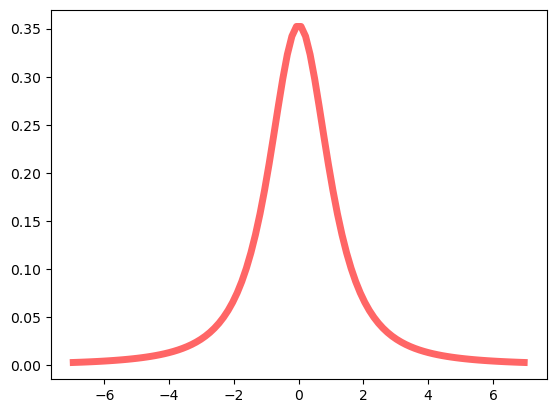

In [26]:
from scipy.stats import t
fig, ax = plt.subplots()
x = np.linspace(t.ppf(0.01, 2), t.ppf(0.99, 2), 100)
ax.plot(x, t.pdf(x, 2),'r-', lw=5, alpha=0.6, label='t pdf')

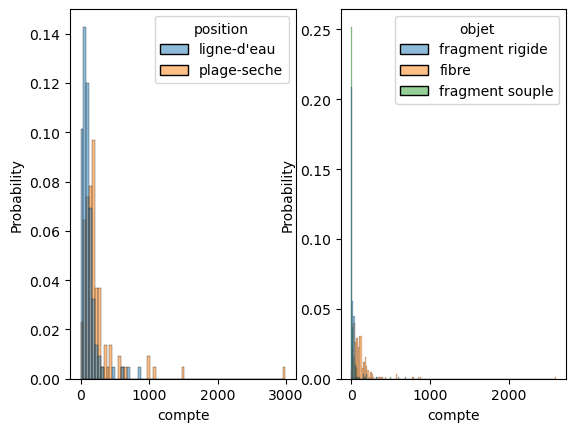

In [19]:
fig, ax = plt.subplots(1,2)

sns.histplot(data=position_sample_totals, x="compte", hue="position", stat="probability", ax=ax[0])
sns.histplot(data=position_totals, x="compte", hue="objet", stat="probability", ax=ax[1])

plt.show()